In [11]:
import sys

sys.path.append('/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code')

import networkx as nx
import experiment_framework as ef
import matplotlib.pyplot as plt
import copy

In [12]:
# Load the graph from the file
save_path = '/Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/wikivote.gpickle'
try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")

Graph loaded from /Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/wikivote.gpickle


In [13]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 2256
Number of deinfluenced nodes: 0
Number of susceptible nodes: 4859
influencer {4481, 6913, 8069, 5511, 2314, 1291, 6538, 3982, 1171, 3606, 3099, 7458, 3875, 2338, 1061, 678, 4263, 5539, 7466, 4655, 559, 52, 2744, 569, 6847, 1471, 4678, 8135, 4039, 4169, 6219, 76, 5579, 2894, 7119, 5587, 2902, 2400, 481, 7525, 102, 1384, 8174, 7024, 1264, 373, 6393, 6010, 5371, 5630}


In [14]:
# Run simulation for different values of k
budget_list = list(range(0, 501, 10))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(0, {'Random': set(), 'Degree': set()}), (10, {'Random': {2849, 2978, 7227, 511}, 'Degree': set()}), (20, {'Random': {1254, 841, 7881, 5868, 7162, 8189}, 'Degree': set()}), (30, {'Random': {4481, 7265, 4198, 5129, 2703, 1808, 8215, 4503, 6206}, 'Degree': set()}), (40, {'Random': {1601, 4706, 6374, 7245, 5517, 4978, 1492, 2392}, 'Degree': {2565}}), (50, {'Random': {35, 1256, 1866, 3755, 2667, 1618, 7737, 1660, 5661}, 'Degree': {2565}}), (60, {'Random': {6850, 1731, 1670, 1798, 269, 3566, 7186, 4819, 5172, 7157, 408, 6969, 6907, 284}, 'Degree': {2565}}), (70, {'Random': {802, 5413, 2215, 3880, 2076, 4593, 1137, 7893, 2293, 4343, 4792, 6870, 2333, 1983, 2685, 6207}, 'Degree': {1549, 2565}}), (80, {'Random': {3213, 6030, 32, 4259, 932, 2727, 42, 816, 2739, 1079, 5817, 3130, 8252, 5712, 3039, 7269, 108, 1005, 3060, 1526, 6015}, 'Degree': {1549, 2565}}), (90, {'Random': {2689, 3209, 5518, 6928, 3986, 3990, 414, 6950, 6185, 3885, 7085, 7217, 307, 5559, 1600, 7109, 3015, 2761, 1225, 2891, 506

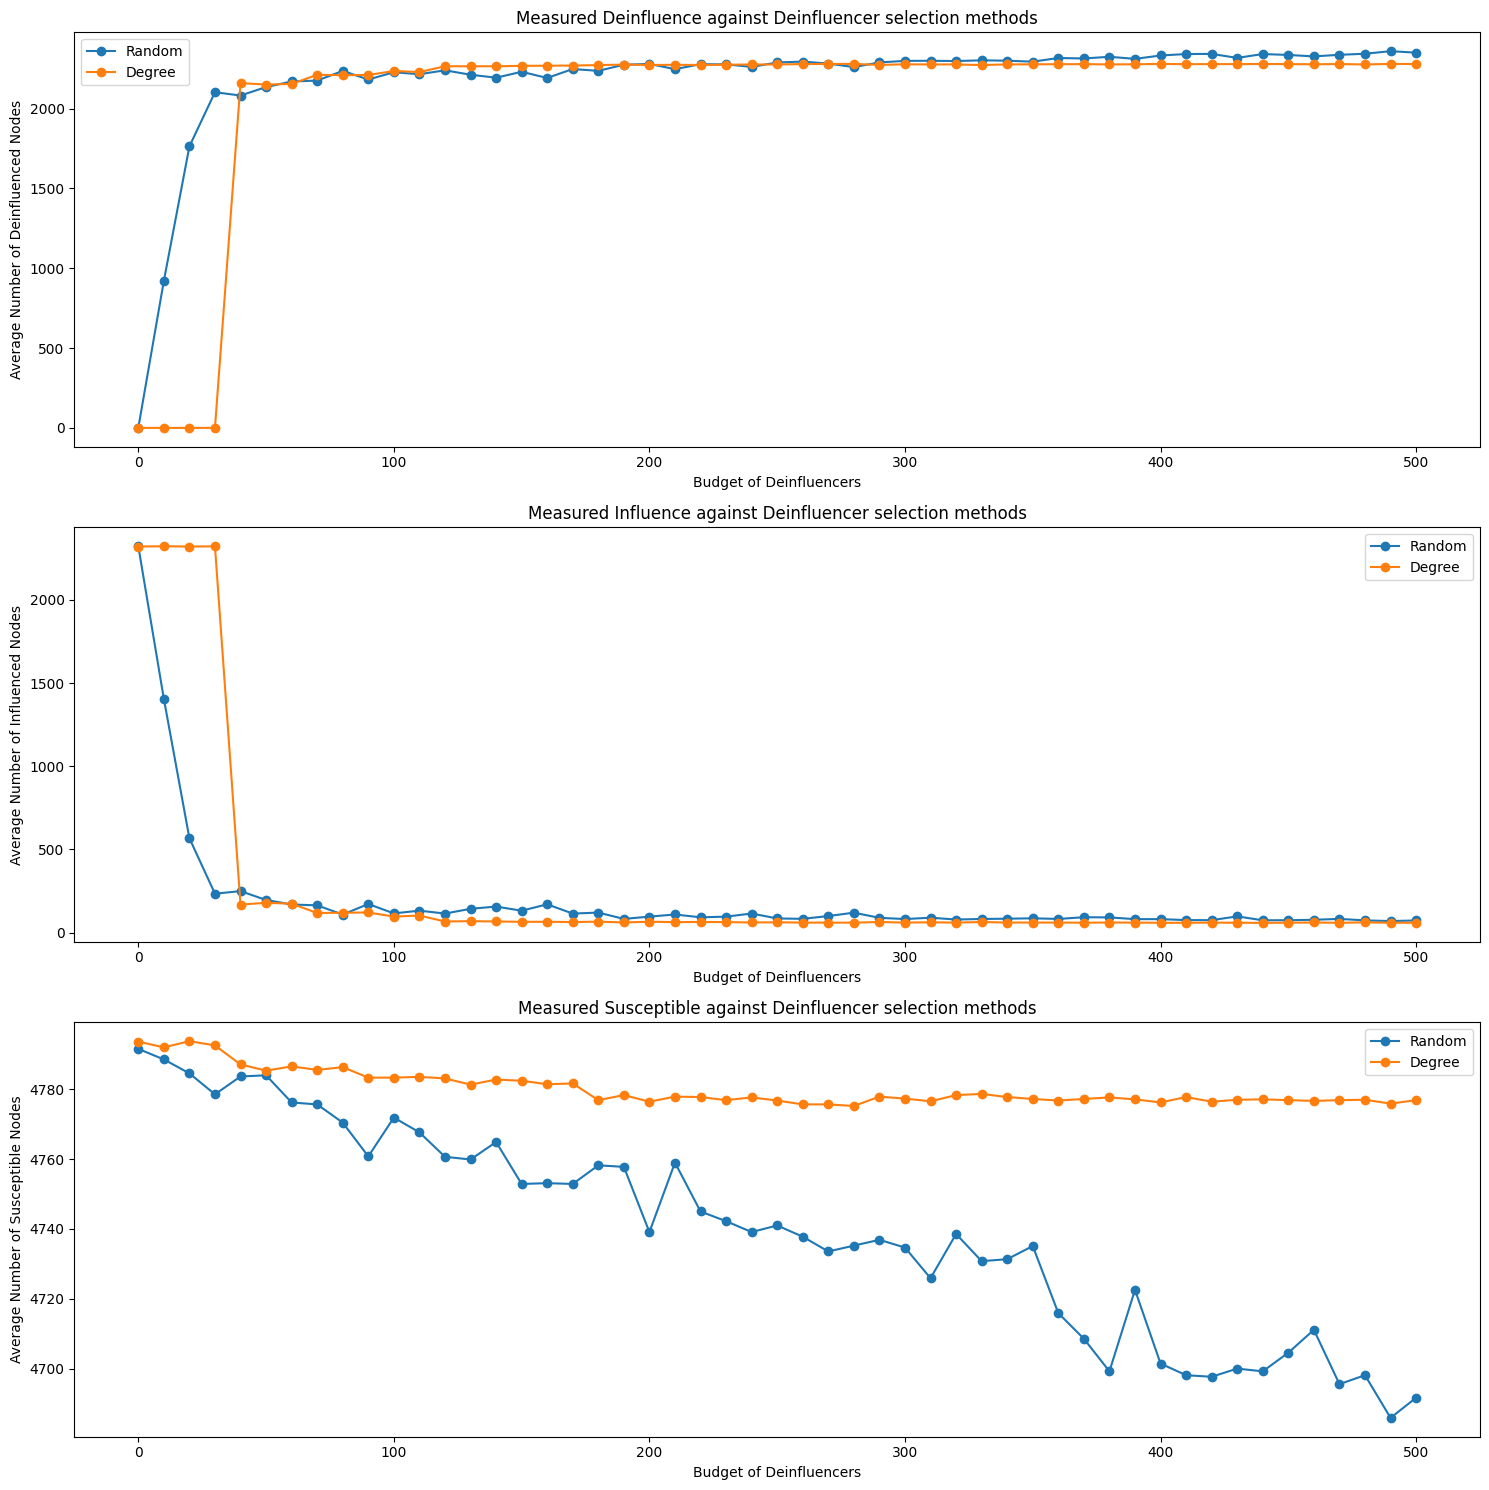

In [15]:
# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [16]:
# Run simulation for different values of k
budget_list = list(range(0, 501, 10))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(0, {'Random': set(), 'Degree': set()}), (10, {'Random': {6813, 5013}, 'Degree': set()}), (20, {'Random': {2715, 413}, 'Degree': set()}), (30, {'Random': {7237, 587, 1873, 1142, 1725}, 'Degree': set()}), (40, {'Random': {7937, 7297, 33, 1987, 4674, 8102, 7716, 3182, 560, 2033, 4436, 1078, 862}, 'Degree': {2565}}), (50, {'Random': {1985, 4203, 3500, 6092, 5166, 1039, 2323, 4436, 3829, 4278, 5181}, 'Degree': {2565}}), (60, {'Random': {8064, 738, 868, 1668, 2886, 615, 4007, 2536, 3911, 8241, 5913, 7231, 7870, 4639}, 'Degree': {2565}}), (70, {'Random': {7813, 8198, 2572, 4123, 7079, 6202, 5827, 7235, 4808, 5962, 6093, 8144, 2257, 342, 7268, 4347, 6396, 6013, 3582}, 'Degree': {1549, 2565}}), (80, {'Random': {5761, 4371, 5526, 8094, 2091, 1589, 5308, 1605, 2384, 5601, 226, 3682, 7138, 1511, 6375, 4333, 4461, 7150, 1648, 4857, 1146, 7419}, 'Degree': {1549, 2565}}), (90, {'Random': {5508, 8293, 71, 6759, 236, 4824, 4242, 3411, 6516, 5332, 4310, 5112, 989}, 'Degree': {1549, 2565}}), (100, {'Ra

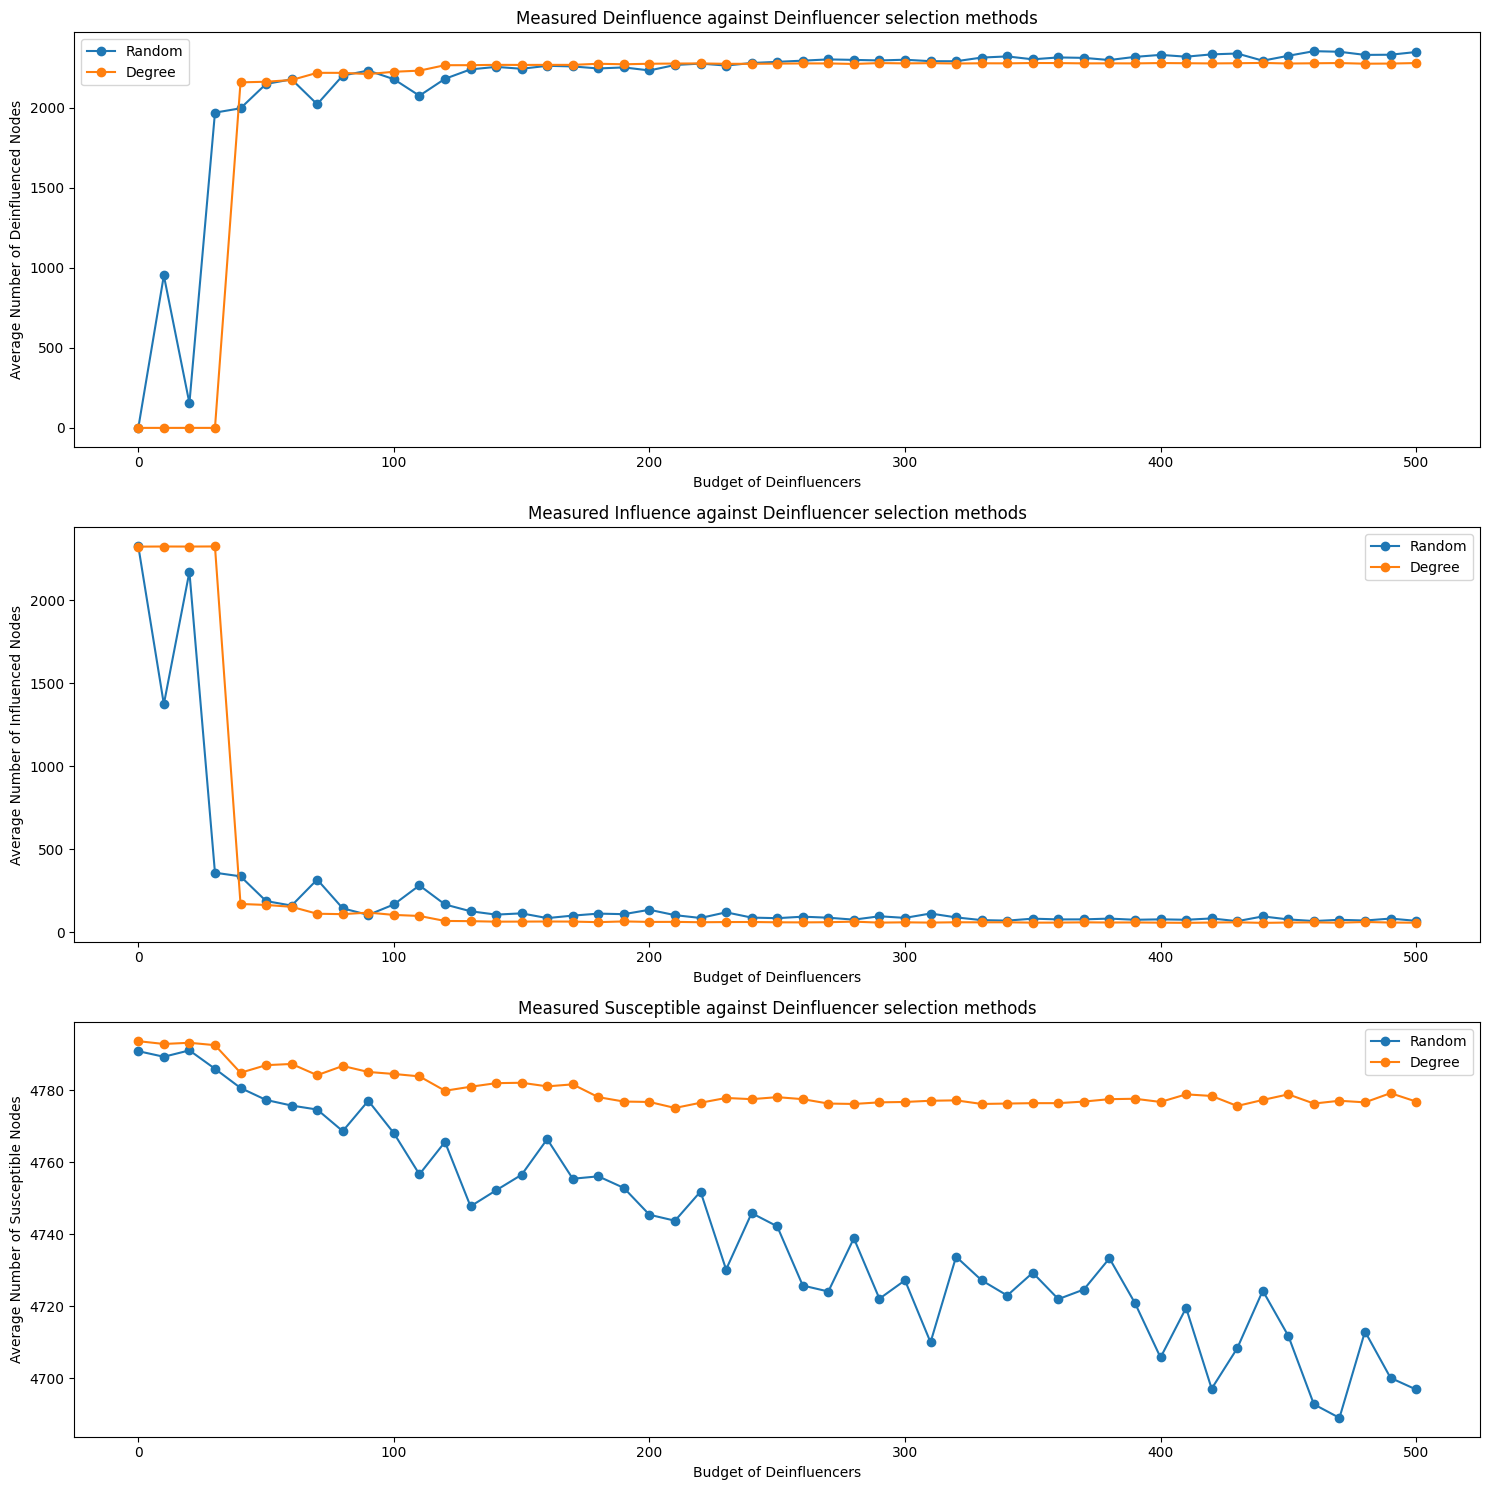

In [17]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()